In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_results = pd.read_csv("/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/double_cascade_identification/training_output/multiple_epochs/merged_files_Feb26/dynedge_dbang_decay_length/estimator_results.csv")
training_results.keys()


Index(['Unnamed: 0', 'dbang_decay_length_pred', 'dbang_decay_length', 'pid',
       'energy', 'event_weight', 'azimuth', 'zenith', 'event_no'],
      dtype='object')

In [3]:
training_results.head()

,Unnamed: 0,dbang_decay_length_pred,dbang_decay_length,pid,energy,event_weight,azimuth,zenith,event_no
0,0,96.476242,326.427683,19.0,4364.911460,7.860462e-11,1.775740,2.512907,0.0
1,1,83.262711,242.947394,19.0,1369.191799,2.004405e-09,5.197904,2.788153,1.0
2,2,86.304710,43.071772,19.0,275.798554,3.979359e-08,4.816091,2.165693,2.0
3,3,87.920357,22.644649,19.0,282.991576,7.664794e-08,3.714113,2.674953,3.0
4,4,101.523491,2.458134,19.0,126.314423,1.101102e-07,4.565181,1.947197,4.0


(array([    0.,     0.,     0.,     0.,     0., 59413.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

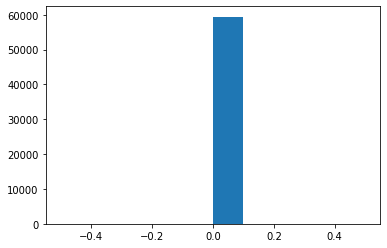

In [4]:
#Change background dbang_decay_length from -1 to 0, and remove log trnasform from estimator task
with_background_results = pd.read_csv("/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/jbook/double_cascade_identification/training_output/multiple_epochs/all_files_corrected_Feb26/dynedge_dbang_decay_length/estimator_results.csv")

background_mask = np.abs(with_background_results['pid'])!=19
bins = np.logspace(0, 5, 50)
plt.hist(with_background_results['dbang_decay_length'][background_mask])
# plt.xscale('log')

In [5]:
with_background_results.head()

,Unnamed: 0,dbang_decay_length_pred,dbang_decay_length,pid,energy,event_weight,azimuth,zenith,event_no
0,0,76.690819,326.427683,19.0,4364.911460,7.860462e-11,1.775740,2.512907,0.0
1,1,60.161800,242.947394,19.0,1369.191799,2.004405e-09,5.197904,2.788153,1.0
2,2,23.014086,43.071772,19.0,275.798554,3.979359e-08,4.816091,2.165693,2.0
3,3,72.663589,22.644649,19.0,282.991576,7.664794e-08,3.714113,2.674953,3.0
4,4,73.644058,2.458134,19.0,126.314423,1.101102e-07,4.565181,1.947197,4.0


Text(0.5, 1.0, 'First attempt at a double cascade estimator, HNL only')

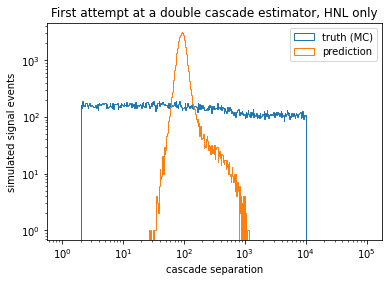

In [7]:
bins = np.logspace(0, 5, 500)

plt.hist(training_results['dbang_decay_length'], histtype="step", bins=bins, label="truth (MC)")
plt.hist(training_results['dbang_decay_length_pred'], histtype="step", bins=bins, label="prediction")

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('cascade separation')
plt.ylabel('simulated signal events')
# plt.xlabel("Energy(GeV)")
plt.title("First attempt at a double cascade estimator, HNL only")

Text(0.5, 1.0, 'First attempt at a double cascade estimator, HNL+OscNext background')

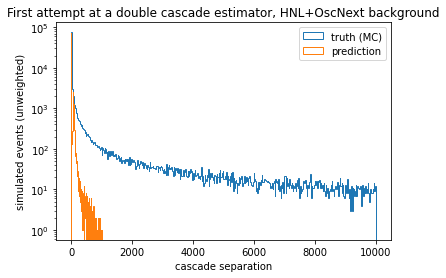

In [8]:
bins = 500#np.logspace(0, 5, 500)

plt.hist(with_background_results['dbang_decay_length'], histtype="step", bins=bins, label="truth (MC)")
plt.hist(with_background_results['dbang_decay_length_pred'], histtype="step", bins=bins, label="prediction")

# plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('cascade separation')
plt.ylabel('simulated events (unweighted)')
# plt.xlabel("Energy(GeV)")
plt.title("First attempt at a double cascade estimator, HNL+OscNext background")

Two figures to work towards: 
Classification score for signal vs background


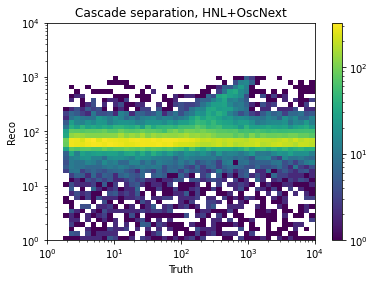

In [10]:
from matplotlib import colors

bins = np.logspace(0, 4, 50)
plt.hist2d(with_background_results['dbang_decay_length'],with_background_results['dbang_decay_length_pred'], bins=bins, norm=colors.LogNorm())

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Truth")
plt.ylabel("Reco")
plt.title("Cascade separation, HNL+OscNext")

plt.colorbar()

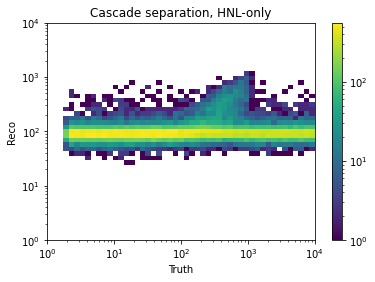

In [11]:
bins = np.logspace(0, 4, 50)
plt.hist2d(training_results['dbang_decay_length'],training_results['dbang_decay_length_pred'], bins=bins, norm=colors.LogNorm())

plt.xscale('log')
plt.yscale('log')

plt.xlabel("Truth")
plt.ylabel("Reco")
plt.title("Cascade separation, HNL-only")

plt.colorbar()

### Hypothesis:
When we have decay lengths in excess of detector size, we shouldn't expect this to do wery well, because our truth-level information doesn't really correlate with the thing we're trying to reconstruct. We need to try this with the resimulated samples, with correct decay lengths, to see if this works.

Evidence for this: Reconstructed decay length never exceeds detector size. This is a good thing!

Other things to try: Raise the initial learning rate?

# Load SQLite databses

In [13]:
import os
import glob as glob

# import sqlite module database 
import sqlite3 

data_parent_dir = '/n/holylfs05/LABS/arguelles_delgado_lab/Lab/IceCube_MC/HNL/sqlite2/'
dataset_ids = [190301, 190302, 190303, 190304, 190305, 190306, 190307, 190308]
background_ids =  ['oscNext']

dataset_paths = []
for did in dataset_ids:
    dataset_paths.extend(glob.glob(os.path.join(data_parent_dir, "{}".format(did), "merged/merged.db")))

background_paths = []
for did in background_ids:
    background_paths.extend(glob.glob(os.path.join(data_parent_dir, "{}".format(did), "merged/merged.db")))
    

In [10]:
dataset_paths
background_paths

['/n/holylfs05/LABS/arguelles_delgado_lab/Lab/IceCube_MC/HNL/sqlite2/oscNext/merged/merged.db']

In [11]:
  # create connection to the database 
connection = sqlite3.connect(dataset_paths[0]) 
background_conn = sqlite3.connect(background_paths[0])
# query to display all data in the table 
cursor = connection.execute("SELECT * from truth") 

# display row by row 
# for row in cursor: 
#     print(row) 
    
# print(cursor.description)

In [12]:
connection.close()

(array([ 7995.,     0.,     0.,  4606.,     0.,     0.,  4827.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 10901.,     0.,     0.,  9927.,     0.,
            0., 21157.]),
 array([-16.  , -15.36, -14.72, -14.08, -13.44, -12.8 , -12.16, -11.52,
        -10.88, -10.24,  -9.6 ,  -8.96,  -8.32,  -7.68,  -7.04,  -6.4 ,
         -5.76,  -5.12,  -4.48,  -3.84,  -3.2 ,  -2.56,  -1.92,  -1.28,
         -0.64,   0.  ,   0.64,   1.28,   1.92,   2.56,   3.2 ,   3.84,
          4.48,   5.12,   5.76,   6.4 ,   7.04,   7.68,   8.32,   8.96,
          9.6 ,  10.24,  10.88,  11.52,  12.16,  12.8 ,  13.44,  14.08,
         14.72,  15.36,  16.  ]),
 <BarContainer object of 50 artists>)

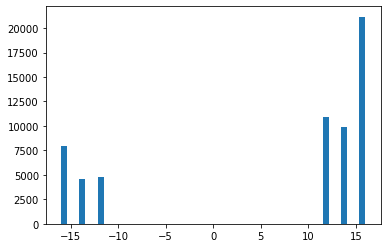

In [6]:
sql_query="SELECT * from truth"

background_db = pd.read_sql(sql_query, background_conn)
background_db['pid']
plt.hist(background_db['pid'], bins=50)

In [8]:
background_db.head()

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,...,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,event_no
0,2.762378,109.123507,-60.569700,-272.291896,0.043763,2.791454,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0
1,4.546402,84.464998,-76.808081,-352.763619,5.156870,1.936755,14.0,1.087909e+17,NuGen,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.519115,102.598663,8.956514,-347.515716,4.942862,2.129853,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2
3,3.188216,42.056913,-106.410514,-270.054008,3.989143,1.758104,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3
4,4.255289,90.686958,-88.251574,-530.563293,0.879610,3.074703,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4


# Change HNL pids

Because the I3 to SQLite converter uses the particle primary ID as PID, nutau -> HNL interactions are labeled as nutaus. We want to differentiate between these and regular nutau events, so when we train on PID, we need to ensure that HNLs have a distinct PID from other tau neutrino events. This way, we can (potentially) differentiate between regular nutau double-cascades and ours.

In [3]:
for path in dataset_paths:
    connection = sqlite3.connect(path)
    c1 = connection.cursor()
    
    # relabel HNLs with correct PID
    c1.execute('''UPDATE truth SET dbang_decay_length = 0.0 where pid = ''')
    c1.execute('''UPDATE truth SET pid = -19.0 where pid = -16.0''')
    
    # Commit your changes in the database 
    connection.commit() 
  
    # Closing the connection 
    connection.close() 

## Change cascade distances to zero when there's no cascade

In [18]:
for path in background_paths:
    connection = sqlite3.connect(path)
    c1 = connection.cursor()
    
    # relabel HNLs with correct PID
    c1.execute('''UPDATE truth SET dbang_decay_length = 0.0 where dbang_decay_length = -1.0''')
    
    # Commit your changes in the database 
    connection.commit() 
  
    # Closing the connection 
    connection.close()

In [19]:
connection = sqlite3.connect(background_paths[0])
sql_query = "SELECT * from truth"
db = pd.read_sql(sql_query, connection)
db['dbang_decay_length']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59408    0.0
59409    0.0
59410    0.0
59411    0.0
59412    0.0
Name: dbang_decay_length, Length: 59413, dtype: float64

In [6]:
db.keys()

Index(['energy', 'position_x', 'position_y', 'position_z', 'azimuth', 'zenith',
       'pid', 'event_time', 'sim_type', 'interaction_type', 'elasticity',
       'RunID', 'SubrunID', 'EventID', 'SubEventID', 'dbang_decay_length',
       'track_length', 'stopped_muon', 'energy_track', 'energy_cascade',
       'inelasticity', 'DeepCoreFilter_13', 'CascadeFilter_13',
       'MuonFilter_13', 'OnlineL2Filter_17', 'L3_oscNext_bool',
       'L4_oscNext_bool', 'L5_oscNext_bool', 'L6_oscNext_bool',
       'L7_oscNext_bool', 'event_weight', 'event_no'],
      dtype='object')

## Weighting

Now, let's try to pull the weights from I3 files and add them to the slqite databases. For the background files, let's use 'TotalInteractionProbabilityWeight' from the I3MCWeightDict. For the signal files, we'll pull the LeptonInjectorWeight and recalculate the lifetime weight with a few values of U_tau^2, and set one of them to be called 'TotalInteractionProbabilityWeight' and used in training. We can change this later, because we're not actually training on the weights.

For now, for comparison to the previous analysis, we'll stick with 10^-3 for our mixing^2. 

In [9]:
from I3Tray import I3Tray
from icecube import icetray, dataio, dataclasses, simclasses
from icecube.LeptonInjector import weight_hnl_generation, load_generation_weighting_files, weight_hnl_lifetime_framewise
from icecube.LeptonInjector.oscnext_frame_objects_weighting import create_weight_dict
from icecube.LeptonInjector import hnl_weighting
from icecube.LeptonInjector.oscnext_tools_misc import UpdateFrameObject
import LeptonWeighter as LW

try: from tqdm import tqdm
except: tqdm = lambda x: x

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_8_x86_64/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Using `import I3Tray` or `from I3Tray import *` is now considered depricated. Please switch to using `from icecube.icetray import I3Tray`
  """Entry point for launching an IPython kernel.
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_8_x86_64/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<char, std::allocator<char> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_8_x86_64/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >, std::allocator<std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/cvmfs/

In [10]:
def weight_hnl_lifetime_framewise_modified(
    frame,
    U_tau4_sq=1e-03,
    c=hnl_weighting.LIGHTSPEED,
    hbar=hnl_weighting.REDUCEDPLANCK,
):
    """
    Function to calculate the lifetime weight per frame (assuming 1/L length sampling) and also add total reference weight for this mixing if wanted.

    Parameters
    ----------
    U_tau4_sq : float
        Chosen mixing strength.
    """

    # Get the weight dict
    with UpdateFrameObject(frame, WEIGHT_DICT_KEY) as weight_dict:

        ##### get needed inputs #####
        # get event properties
        EventProperties = frame['EventProperties']
        mass = EventProperties.mHNL  # HNL mass in GeV

        # get hnl energy
        hnl_true = (frame["I3MCTree"].get_daughters(frame["I3MCTree"].primaries[0]))[0]
        assert hnl_true.type == dataclasses.I3Particle.HNL or dataclasses.I3Particle.HNLBar
        energy = hnl_true.energy  # HNL kinetic energy in GeV

        # get event properties
        tau = EventProperties.lifetime  # HNL lifetime in rest frame in ns
        distance_min = EventProperties.distanceMin  # generation decay length minimum in m
        distance_max = EventProperties.distanceMax  # generation decay length maximum in m
        ##### end #####

        gamma = np.sqrt(energy**2 + mass**2) / mass  # Etot/E0
        speed = c * np.sqrt(1 - np.power(1.0 / gamma, 2))  # c * sqrt(1-1/gamma^2)

        tau_min = distance_min / (gamma * speed)
        tau_max = distance_max / (gamma * speed)

        tau = 1e-09 * tau  # convert to seconds
        tau_proper = hbar / (FullWidth_Array(mass) * U_tau4_sq)

        pdf_inverse = (1.0 / (np.log(tau_max) - np.log(tau_min))) * (
            1.0 / tau
        )  # for 1/L sampling of decay length

        pdf_exp1 = 1.0 / tau_proper
        pdf_exp2 = np.exp(-tau / tau_proper)

        pdf_exp = pdf_exp1 * pdf_exp2

        weight_lifetime = pdf_exp / pdf_inverse

    return weight_lifetime


In [17]:
# Read in I3 files:

#Should read det level files
def get_weights(files, nfiles=None):
    U_tau_sq = 10e-3
    weights = []
    energies = []
    if nfiles is None: nfiles = len(files)

    # Loop over the files
    for f in tqdm(files):
        i3file = dataio.I3File(f)
        
        # And loop through frames for this file
        while i3file.more():
            frame = i3file.pop_frame()
            
            if frame.Stop != icetray.I3Frame.DAQ: 
                continue
                
            if not frame.Has("I3MCWeightDict"):
                print("this event wasn't weighted!")
                break
            
            if 'TotalInteractionProbabilityWeight' in frame["I3MCWeightDict"].keys():
                weights.append(frame["I3MCWeightDict"]['TotalInteractionProbabilityWeight'])
            else:
                total_weight = frame["I3MCWeightDict"]['LeptonInjectorWeight']*weight_hnl_lifetime_framewise_modified(frame, U_tau4_sq = U_tau_sq)*U_tau_sq
                weights.append(total_weight)
            energies.append(frame['I3MCTree'].primaries[0].energy)
    return weights, energies

In [13]:
signal_mc_dir = "/n/holylfs05/LABS/arguelles_delgado_lab/Lab/IceCube_MC/HNL/"
signal_keys = dataset_ids

L2_files = []

for skey in signal_keys:
    skey = str(skey)
    files = sorted(glob.glob(os.path.join(signal_mc_dir, skey, "L2/*.i3.zst")))
#     print(files)
    L2_files.append(files)

In [14]:
#Flatten the list
L2_files = [item for sublist in L2_files for item in sublist]

In [86]:
hnl_weights = get_weights(L2_files)

100%|██████████| 141/141 [00:32<00:00,  4.34it/s]


In [18]:
background_mc_dir = "/n/holylfs05/LABS/arguelles_delgado_lab/Lab/IceCube_MC/oscNext/"
# background_keys = ['000291', '000']
# It look slike we pulled all the background files we have, so we have electron, muon, and tau neutrinos.

background_files = []

background_files = sorted(glob.glob(os.path.join(background_mc_dir, "*.i3.zst")))
# print(background_files)
#     print(files)
background_weights, energies = get_weights(background_files)

100%|██████████| 15/15 [00:25<00:00,  1.68s/it]


In [19]:
background_weights

[1.146740723298837e-09,
 1.2707660459254675e-09,
 4.388497607725229e-10,
 6.075349001878206e-10,
 1.146740723298837e-09,
 1.1389491815211485e-09,
 1.2899191178454985e-09,
 9.624451929219237e-10,
 8.36817874434877e-10,
 5.460957444266679e-10,
 6.075349001878206e-10,
 5.003850339149591e-10,
 4.3669643372323643e-10,
 5.336947282532766e-10,
 5.481585677321801e-10,
 9.075817013466619e-10,
 5.563989119391299e-10,
 8.918893579567067e-10,
 4.5385749276880027e-10,
 9.114964025444039e-10,
 1.150636642462332e-09,
 9.782166576354653e-10,
 1.127263882890787e-09,
 5.399004800723218e-10,
 1.0532305552636959e-09,
 4.474392926904688e-10,
 1.123369659800424e-09,
 5.871549658220216e-10,
 4.1937860146676387e-10,
 1.064967987632741e-09,
 1.061060047162214e-09,
 9.624451929219237e-10,
 8.446608744740835e-10,
 1.0727725877151544e-09,
 1.127263882890787e-09,
 3.842432601206003e-10,
 5.871549658220216e-10,
 6.156594286202699e-10,
 5.099513982263292e-10,
 1.1311586007704919e-09,
 1.209008751036446e-09,
 6.36639

In [20]:
energies

[3.3735066784072614,
 3.7983538787940123,
 2.6198179694617836,
 3.702714586750198,
 3.366506185668995,
 3.3408669134822913,
 3.865214494103789,
 2.740016098135015,
 2.3216787457630494,
 3.3049449673946754,
 3.6961784909698885,
 3.01565757184291,
 2.6097250126717277,
 3.225969939863241,
 3.3193660150206226,
 2.5644224758732275,
 3.36401291844136,
 2.5044193580710568,
 2.714738165754539,
 2.5707493780335016,
 3.381836098470582,
 2.794421536309086,
 3.3036563357028013,
 3.257834203096008,
 3.0537531761698955,
 2.681229671025789,
 3.295543089548627,
 3.5657779989348155,
 2.5114705352138484,
 3.093083285069059,
 3.075299558542667,
 2.740518514782497,
 2.350856752265868,
 3.1131772026992883,
 3.307050337301192,
 2.294870248840098,
 3.564259531251001,
 3.7591472080223425,
 1.2712704160089316,
 3.3116143405889273,
 3.5846476493767074,
 1.6562390759421846,
 2.907610253191758,
 2.3288038159068964,
 3.716559793976655,
 3.4681223558022807,
 2.5232071914875824,
 3.7173244048170107,
 1.0745045728234

In [21]:
background_db.head()

,energy,position_x,position_y,position_z,azimuth,zenith,pid,event_time,sim_type,interaction_type,...,DeepCoreFilter_13,CascadeFilter_13,MuonFilter_13,OnlineL2Filter_17,L3_oscNext_bool,L4_oscNext_bool,L5_oscNext_bool,L6_oscNext_bool,L7_oscNext_bool,event_no
0,2.762378,109.123507,-60.569700,-272.291896,0.043763,2.791454,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0
1,4.546402,84.464998,-76.808081,-352.763619,5.156870,1.936755,14.0,1.087909e+17,NuGen,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,1.519115,102.598663,8.956514,-347.515716,4.942862,2.129853,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2
3,3.188216,42.056913,-106.410514,-270.054008,3.989143,1.758104,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3
4,4.255289,90.686958,-88.251574,-530.563293,0.879610,3.074703,14.0,1.087909e+17,NuGen,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,4
